# **Transformée de Fourier discrète explicite**

On a défini ci-dessous une fonction TFD qui renvoie la transformée de Fourier discrète $X$ d'un signal $x$. 

In [4]:
import numpy as np

def TFD(x):
    #N est la Taille de l'échantillon x
    N = x.size
    # On construit la matrice de la TFD
    n = np.arange(N)
    k = n.reshape((N, 1)) # k <- n sous forme de matrice colonne
    M = np.exp(-2j * np.pi * k * n / N) # matrice N*N des omega^(-k*n) où omega = exp(2iPi/N)
    return np.dot(M, x)
    # On renvoie le vecteur X, résultat du produit matriciel Mx

In [ ]:
x = np.array([1,1])
TFD(x)

Exécuter les deux cellules ci-dessus. Puis modifier x pour obtenir la TFD de (1, 0, 1)  

*(La lettre j désigne le nombre i)*

Dans numpy, np.abs(Z) renvoie le module du nombre complexe Z et $e-10 = 10^{-10}$. 

Exécuter la cellule ci-dessous, observer les compostantes $|X_i|$ et comparer les ordres de grandeur.

In [ ]:
x = np.array([1,0,1])
np.abs(TFD(x))

**Votre réponse:**




**Application à un sinial périodique:**

A l'aide d'un signal périodique s'écrivant comme somme de deux signaux sinusoïdaux

connus, nous allons vérifier que la TFD permet bien de retrouver les fréquences en jeu.


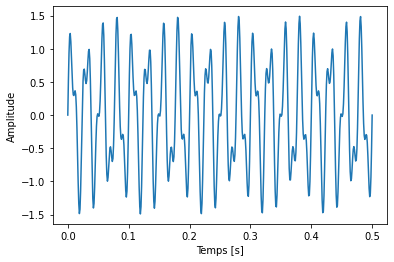

In [7]:
# CELLULE 1

import matplotlib.pyplot as plt

t = np.linspace(0, 0.5, 500) # 500 temps entre 0s et 0.5s

# On prend un échantillon de 500 valeurs du signal entre 0 s et 0.5
x = 1 * np.sin(40 * 2 * np.pi * t) + 0.5 * np.sin(90 * 2 * np.pi * t)

# On trace le signal échantillonné
plt.ylabel("Amplitude")
plt.xlabel("Temps [s]")
plt.plot(t, x)
plt.show()

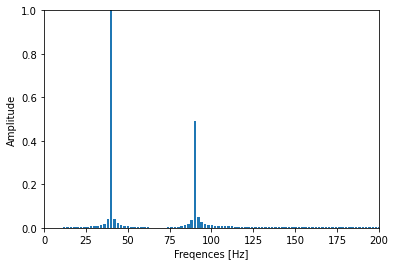

In [8]:
T = 0.001  # période d'échantillonnage 0.5 s / 500 valeurs observées
X = TFD(x) # On calcul la TFD de l'échantillon du signal
N = X.size
freqences = np.linspace(0, 1/T, N)
spectre = np.abs(X)
spectre = spectre/spectre.max()
plt.ylabel("Amplitude")
plt.xlabel("Freqences [Hz]")
plt.bar(freqences[:N // 2], spectre[:N // 2], width=1.5)
# On ne considère que la moitié du spectre pour des raisons de symétrie 
plt.axis([0,200,0,1])  
plt.show()

On observe bien deux raies pour 40 Hz et 90 Hz. Modifier le signal x (CELLULE 1 ligne 8) 

en choisissant des fréquences inférieures à 200 Hz et observer le spectre obtenu.

Modifier également les amplitudes (1 et 0.5).